In [185]:
import pandas as pd
import numpy as np
from math import log
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
plt.style.use('ggplot')
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
%matplotlib inline

In [2]:
seattle_data = pd.read_csv('seattle_incidents_summer_2014.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [214]:
#seattle_data.head(5)

In [22]:
seattle_data.columns.values.tolist()

['RMS CDW ID',
 'General Offense Number',
 'Offense Code',
 'Offense Code Extension',
 'Offense Type',
 'Summary Offense Code',
 'Summarized Offense Description',
 'Date Reported',
 'Occurred Date or Date Range Start',
 'Occurred Date Range End',
 'Hundred Block Location',
 'District/Sector',
 'Zone/Beat',
 'Census Tract 2000',
 'Longitude',
 'Latitude',
 'Location',
 'Month',
 'Year',
 'Crime_Hour_Rptd']

In [16]:
seattle_data['Date Reported']= pd.to_datetime(seattle_data['Date Reported'])

In [21]:
seattle_data['Crime_Hour_Rptd'] = seattle_data['Date Reported'].dt.hour

In [98]:
agg_data = pd.DataFrame({'count' : seattle_data.groupby( ['Crime_Hour_Rptd', 'Summarized Offense Description'] ).size()}).reset_index()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


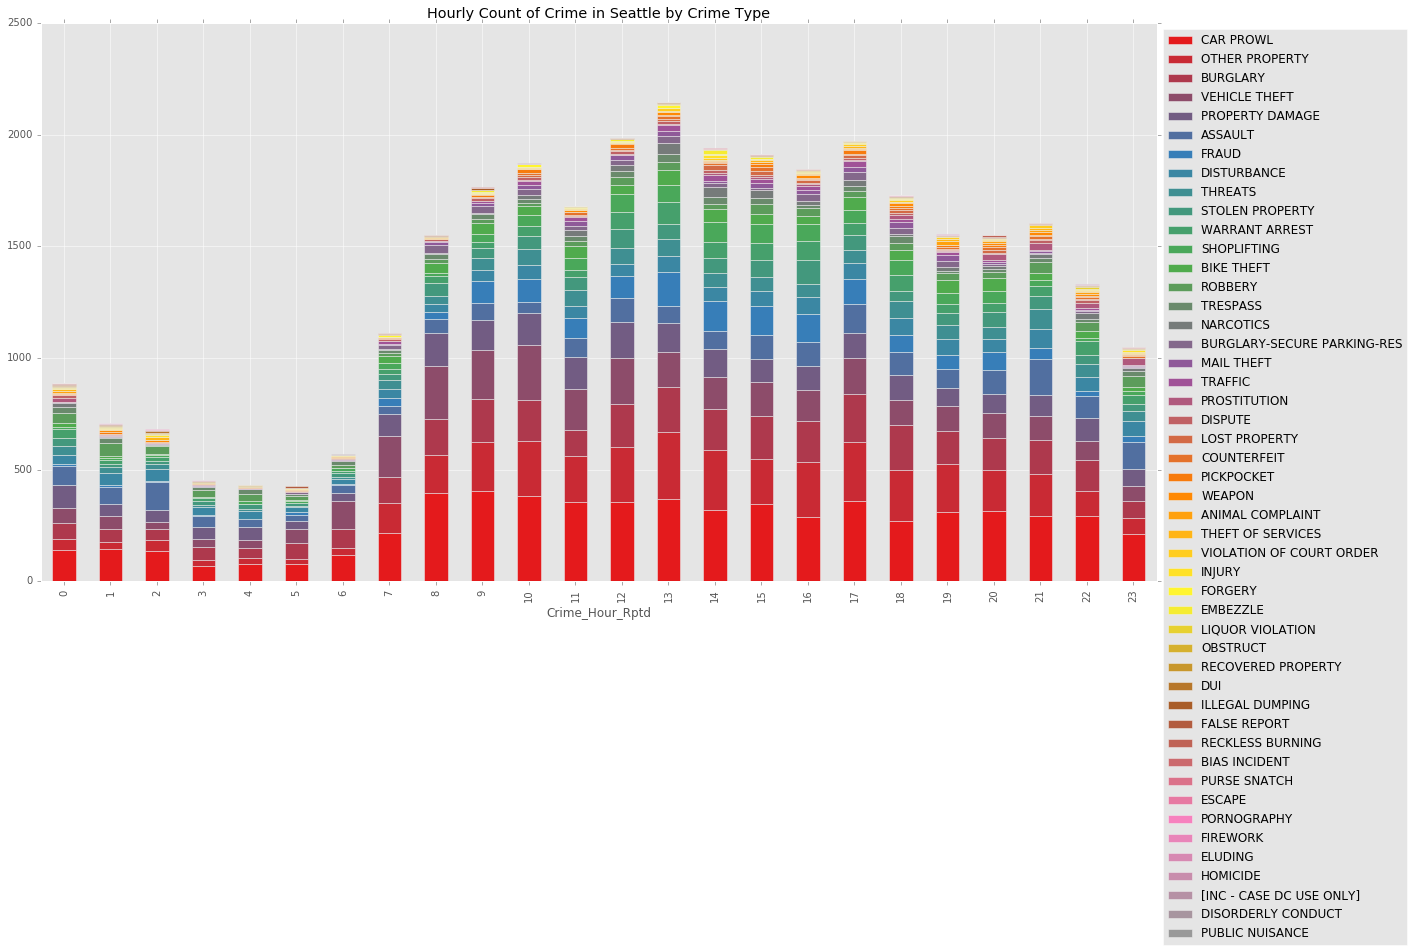

In [179]:
agg_data2 = agg_data.pivot(index='Crime_Hour_Rptd', columns='Summarized Offense Description', values='count')
#len(agg_data2)
agg_data2 = agg_data2.reindex_axis(month_agg_data2.mean().order(ascending=False).index, axis=1)
ax.set_ylabel('Crime Count')
agg_data2.plot(kind='bar', title = "Hourly Count of Crime in Seattle by Crime Type", stacked=True, legend =False,  figsize=(20,10), colormap='Set1').legend(loc='lower', bbox_to_anchor=(1,1))


# Key insights - 1:
#1. Crime in seattle is eveny distributed throughout the day and tapers off in the night.
#2. Most common type of Crime is Car Prowl, followed by Other Property, burglary and Vehicle theft

In [163]:
month_agg_data = pd.DataFrame({'count' : seattle_data.groupby( ['Month', 'Summarized Offense Description'] ).size()}).reset_index()

In [172]:
month_agg_data = month_agg_data.sort(columns = 'count', ascending = False) 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [180]:
#month_agg_data

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


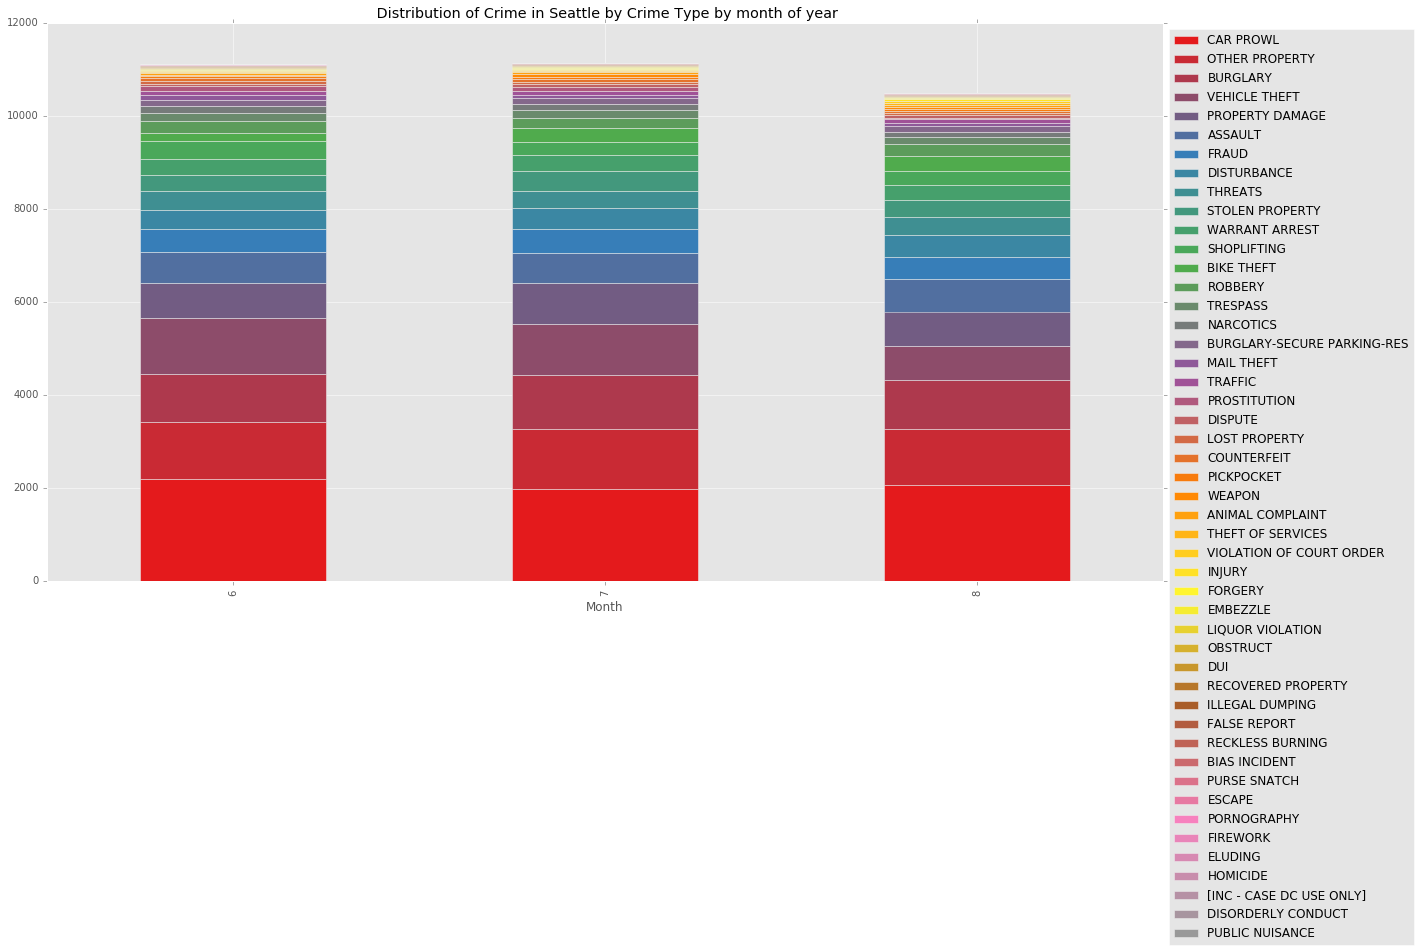

In [178]:
month_agg_data2 = month_agg_data.pivot(index='Month', columns='Summarized Offense Description', values='count')
#len(agg_data2)
month_agg_data2 = month_agg_data2.reindex_axis(month_agg_data2.mean().order(ascending=False).index, axis=1)
ax.set_ylabel('Crime Count')
month_agg_data2.plot(kind='bar', title = " Distribution of Crime in Seattle by Crime Type by month of year", stacked=True, legend =False,  figsize=(20,10), colormap='Set1').legend(loc='lower', bbox_to_anchor=(1,1))

# Key Insights - 2
#1. Overall volume and distribution of crime by crime type in Seattle is fairly similar for all of the summer months, though August shows slightly lower volume of crime compared June and July of 2014
#2. Lower volume in August compared to other summer months is primarily driven by drop in the volume of Vehicle Theft

In [207]:
car_prowl = seattle_data[seattle_data['Summarized Offense Description']== 'CAR PROWL']
oth_prop = seattle_data[seattle_data['Summarized Offense Description']== 'OTHER PROPERTY']
burglary = seattle_data[seattle_data['Summarized Offense Description']== 'BURGLARY']
veh_theft = seattle_data[seattle_data['Summarized Offense Description']== 'VEHICLE THEFT']


lon_list1 = car_prowl['Longitude'].values.tolist()
lat_list1 = car_prowl['Latitude'].values.tolist()


lon_list2 = oth_prop['Longitude'].values.tolist()
lat_list2 = oth_prop['Latitude'].values.tolist()


lon_list3 = burglary['Longitude'].values.tolist()
lat_list3 = burglary['Latitude'].values.tolist()

lon_list4 = veh_theft['Longitude'].values.tolist()
lat_list4 = veh_theft['Latitude'].values.tolist()


In [208]:
print len(lon_list1), len(lat_list1)
print len(lon_list2), len(lat_list2)
print len(lon_list3), len(lat_list3)
print len(lon_list4), len(lat_list4)

6230 6230
3755 3755
3212 3212
3057 3057


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.425,47.46,-122.2385,47.74&bboxSR=4326&imageSR=4326&size=1500,2252&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.425,47.46,-122.2385,47.74&bboxSR=4326&imageSR=4326&size=1500,2252&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.425,47.46,-122.2385,47.74&bboxSR=4326&imageSR=4326&size=1500,2252&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-122.425,47.46,-122.2385,47.74&bboxSR=4326&imageSR=4326&size=1500,2252&dpi=96&format=png32&f=image


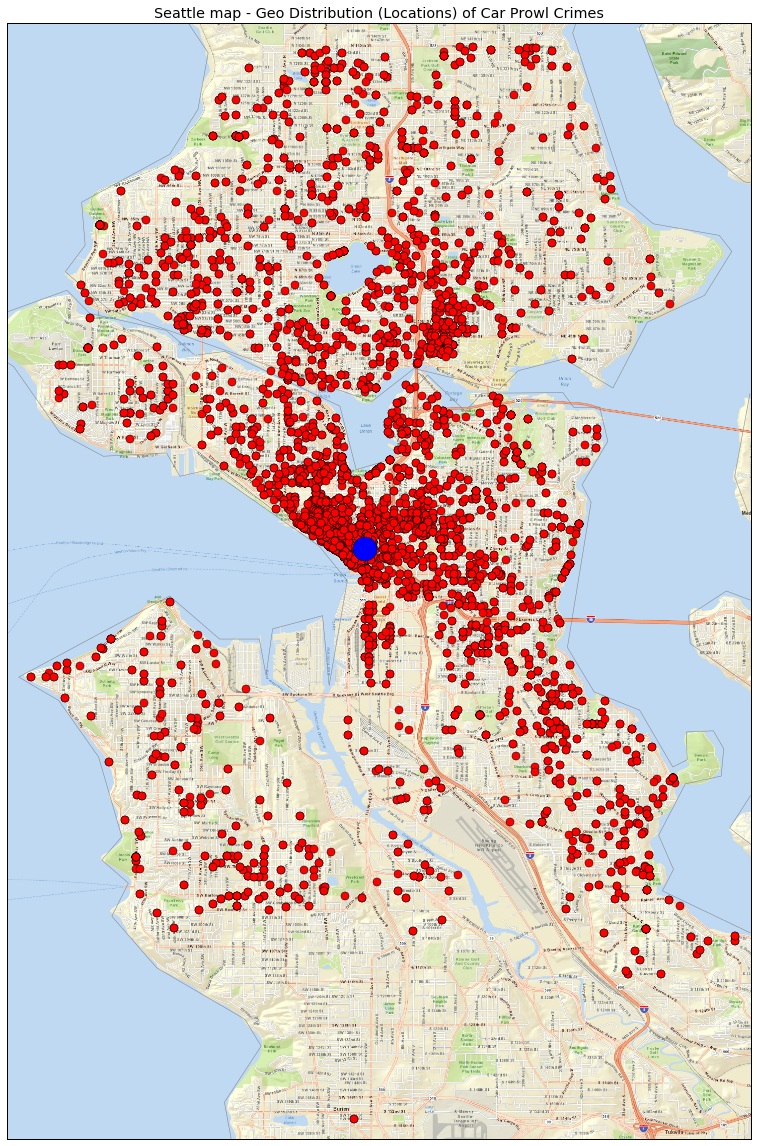

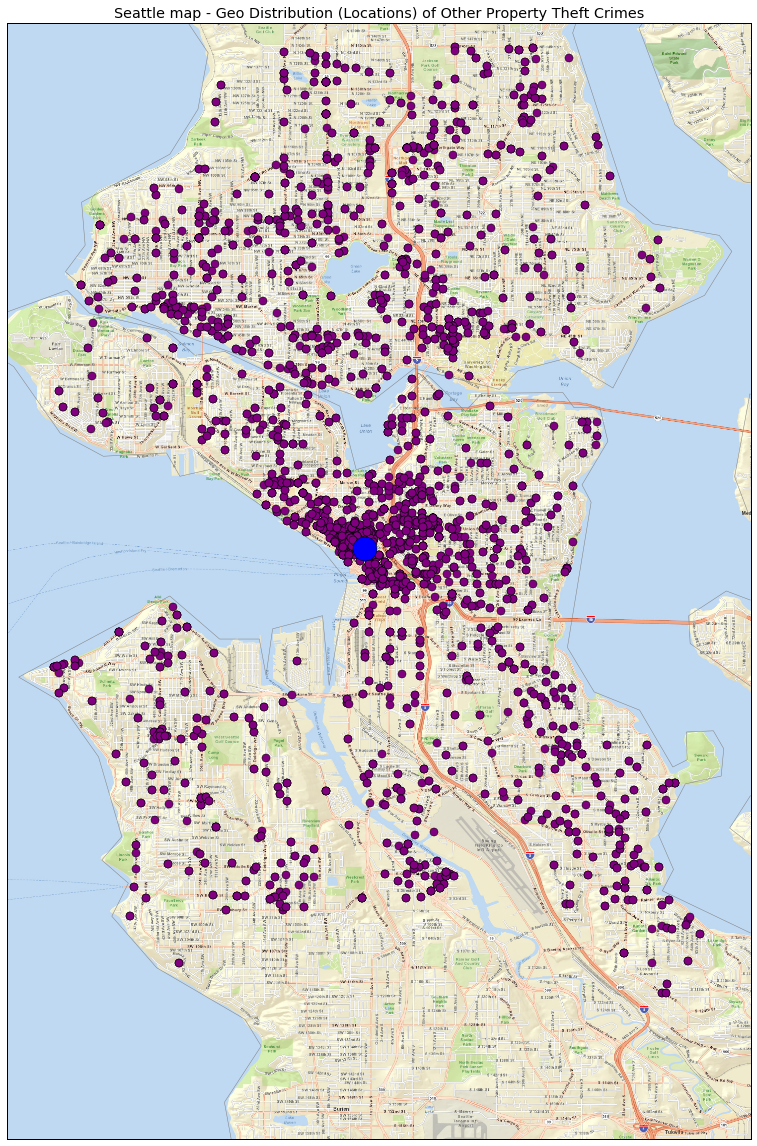

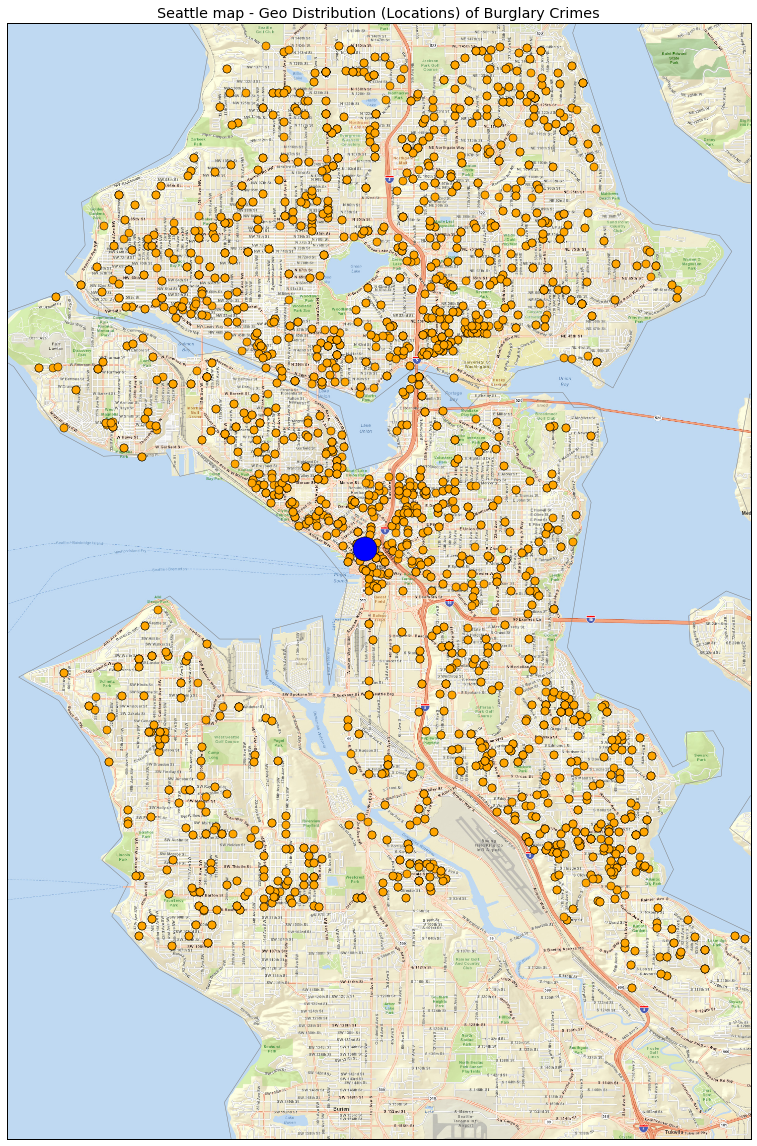

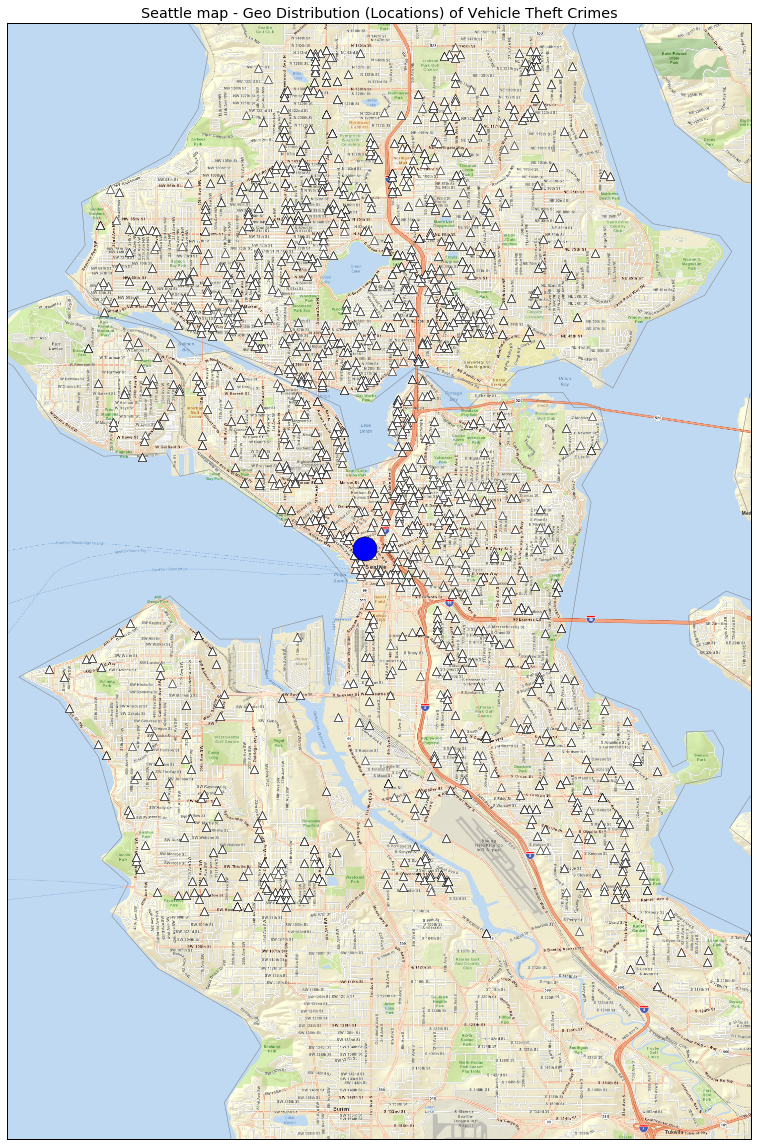

In [213]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,20))
 
map = Basemap(projection='cyl', lat_0 = 47, lon_0 = -122,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-122.425, llcrnrlat=47.46,
    urcrnrlon=-122.2385, urcrnrlat=47.74)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1500, verbose=True)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1],color='y')
map.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0],color='y')
map.drawcoastlines(linewidth=0.5,color='0.5')
map.drawcountries()
#map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lon = -122.335167
lat = 47.608013
x,y = map(lon, lat)
plt.title('Seattle map - Geo Distribution (Locations) of Car Prowl Crimes') 


for each in range(len(lon_list1)):
    x1,y1 = map(lon_list1[each], lat_list1[each])
    map.plot(x1, y1, 'ro', markersize=8)
    
map.plot(x, y, 'bo', markersize=24)



plt.figure(figsize=(20,20))
 
map = Basemap(projection='cyl', lat_0 = 47, lon_0 = -122,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-122.425, llcrnrlat=47.46,
    urcrnrlon=-122.2385, urcrnrlat=47.74)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1500, verbose=True)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1],color='y')
map.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0],color='y')
map.drawcoastlines(linewidth=0.5,color='0.5')
map.drawcountries()
#map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lon = -122.335167
lat = 47.608013
x,y = map(lon, lat)
plt.title('Seattle map - Geo Distribution (Locations) of Other Property Theft Crimes') 


for each in range(len(lon_list2)):
    x1,y1 = map(lon_list2[each], lat_list2[each])
    map.plot(x1, y1, color ='purple', marker = 'o', markersize=8)

map.plot(x, y, 'bo', markersize=24)



plt.figure(figsize=(20,20))
 
map = Basemap(projection='cyl', lat_0 = 47, lon_0 = -122,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-122.425, llcrnrlat=47.46,
    urcrnrlon=-122.2385, urcrnrlat=47.74)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1500, verbose=True)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1],color='y')
map.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0],color='y')
map.drawcoastlines(linewidth=0.5,color='0.5')
map.drawcountries()
#map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lon = -122.335167
lat = 47.608013
x,y = map(lon, lat)
plt.title('Seattle map - Geo Distribution (Locations) of Burglary Crimes') 


for each in range(len(lon_list3)):
    x1,y1 = map(lon_list3[each], lat_list3[each])
    map.plot(x1, y1, color ='orange', marker = 'o', markersize=8)

map.plot(x, y, 'bo', markersize=24)



plt.figure(figsize=(20,20))
 
map = Basemap(projection='cyl', lat_0 = 47, lon_0 = -122,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-122.425, llcrnrlat=47.46,
    urcrnrlon=-122.2385, urcrnrlat=47.74)
map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 1500, verbose=True)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1],color='y')
map.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0],color='y')
map.drawcoastlines(linewidth=0.5,color='0.5')
map.drawcountries()
#map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lon = -122.335167
lat = 47.608013
x,y = map(lon, lat)
plt.title('Seattle map - Geo Distribution (Locations) of Vehicle Theft Crimes') 

for each in range(len(lon_list4)):
    x1,y1 = map(lon_list4[each], lat_list4[each])
    map.plot(x1, y1, color ='white', marker = '^', markersize=8)

map.plot(x, y, 'bo', markersize=24)




plt.show()





# Key Insights - 3
#1. Car Prowl Crimes seems to be heavily concentrated near City Center (Blue Circle Dot), and becomes sparser as we move away from the City. This makes intuitive sense as road parking on the City presents easier access to criminals.

#2. Other Property Theft seems to be concentrated heavily close to city center which can be explained by shops and stores that are prone to these crimes in City Center.

#3. Burglary Crimes and Vehicle Theft Crimes seems to be evenly spread out throughout the City with larger concentration closer to city center and northern parts of the city. 

#4. Overall concentration of these crimes are much lower in southwest parts of the city
    